In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("F:/DEPI Graduation Project/FMCG_2022_2024.csv")

In [3]:
df.head()

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190757 entries, 0 to 190756
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             190757 non-null  object 
 1   sku              190757 non-null  object 
 2   brand            190757 non-null  object 
 3   segment          190757 non-null  object 
 4   category         190757 non-null  object 
 5   channel          190757 non-null  object 
 6   region           190757 non-null  object 
 7   pack_type        190757 non-null  object 
 8   price_unit       190757 non-null  float64
 9   promotion_flag   190757 non-null  int64  
 10  delivery_days    190757 non-null  int64  
 11  stock_available  190757 non-null  int64  
 12  delivered_qty    190757 non-null  int64  
 13  units_sold       190757 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 20.4+ MB


In [5]:
df.shape

(190757, 14)

In [6]:
df.columns

Index(['date', 'sku', 'brand', 'segment', 'category', 'channel', 'region',
       'pack_type', 'price_unit', 'promotion_flag', 'delivery_days',
       'stock_available', 'delivered_qty', 'units_sold'],
      dtype='object')

In [7]:
df.describe()

,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
count,190757.000000,190757.000000,190757.000000,190757.000000,190757.000000,190757.000000
mean,5.251979,0.149200,3.004860,157.697652,179.333655,19.919709
std,2.166705,0.356287,1.414626,52.736104,40.037475,11.770077
min,1.500000,0.000000,1.000000,-12.000000,-11.000000,-25.000000
25%,3.380000,0.000000,2.000000,124.000000,152.000000,12.000000
50%,5.250000,0.000000,3.000000,155.000000,179.000000,18.000000
75%,7.130000,0.000000,4.000000,192.000000,206.000000,25.000000
max,9.000000,1.000000,5.000000,405.000000,366.000000,139.000000


There is a negative values in stock_available and delievered_qty and units_sold need modifications


In [8]:
df['sku'].unique()

array(['MI-006', 'MI-026', 'YO-029', 'YO-005', 'YO-012', 'YO-014',
       'YO-001', 'RE-004', 'RE-007', 'RE-015', 'MI-023', 'JU-021',
       'YO-009', 'SN-027', 'YO-003', 'MI-022', 'YO-016', 'RE-025',
       'SN-010', 'RE-017', 'SN-013', 'YO-020', 'SN-019', 'MI-002',
       'MI-011', 'YO-024', 'MI-008', 'SN-028', 'YO-018', 'SN-030'],
      dtype=object)

In [9]:
df['brand'].unique()

array(['MiBrand1', 'MiBrand4', 'YoBrand4', 'YoBrand2', 'YoBrand1',
       'YoBrand3', 'ReBrand1', 'ReBrand4', 'MiBrand3', 'JuBrand3',
       'SnBrand2', 'ReBrand2', 'SnBrand3', 'MiBrand2'], dtype=object)

In [10]:
df['segment'].unique()

array(['Milk-Seg3', 'Milk-Seg2', 'Yogurt-Seg2', 'Yogurt-Seg1',
       'Yogurt-Seg3', 'ReadyMeal-Seg2', 'ReadyMeal-Seg1', 'Juice-Seg3',
       'SnackBar-Seg3', 'ReadyMeal-Seg3', 'SnackBar-Seg2',
       'SnackBar-Seg1', 'Milk-Seg1'], dtype=object)

In [11]:
df['category'].unique()

array(['Milk', 'Yogurt', 'ReadyMeal', 'Juice', 'SnackBar'], dtype=object)

In [12]:
df['channel'].unique()

array(['Retail', 'Discount', 'E-commerce'], dtype=object)

In [13]:
df['region'].unique()

array(['PL-Central', 'PL-North', 'PL-South'], dtype=object)

In [14]:
df['pack_type'].unique()

array(['Multipack', 'Single', 'Carton'], dtype=object)

There is no data recorded in different ways in all categorical data

In [15]:
df.duplicated().sum()

np.int64(0)

There is no duplicate data 

In [16]:
numeric_columns = df.select_dtypes(include=['number'])

In [17]:
negative_counts = (numeric_columns < 0).sum()
negative_counts

price_unit         0
promotion_flag     0
delivery_days      0
stock_available    3
delivered_qty      3
units_sold         3
dtype: int64

In [18]:
df = df[(numeric_columns >= 0).all(axis=1)]

In [19]:
df.describe()

,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
count,190754.000000,190754.000000,190754.000000,190754.000000,190754.000000,190754.000000
mean,5.251989,0.149197,3.004839,157.700237,179.336585,19.920211
std,2.166692,0.356284,1.414626,52.732487,40.030968,11.769429
min,1.500000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,3.380000,0.000000,2.000000,124.000000,152.000000,12.000000
50%,5.250000,0.000000,3.000000,155.000000,179.000000,18.000000
75%,7.130000,0.000000,4.000000,192.000000,206.000000,25.000000
max,9.000000,1.000000,5.000000,405.000000,366.000000,139.000000


In [20]:
df.shape

(190754, 14)

3 rows of negative values in numeric colums are removed

In [21]:
df.isnull().sum()

date               0
sku                0
brand              0
segment            0
category           0
channel            0
region             0
pack_type          0
price_unit         0
promotion_flag     0
delivery_days      0
stock_available    0
delivered_qty      0
units_sold         0
dtype: int64

<Axes: xlabel='delivery_days'>

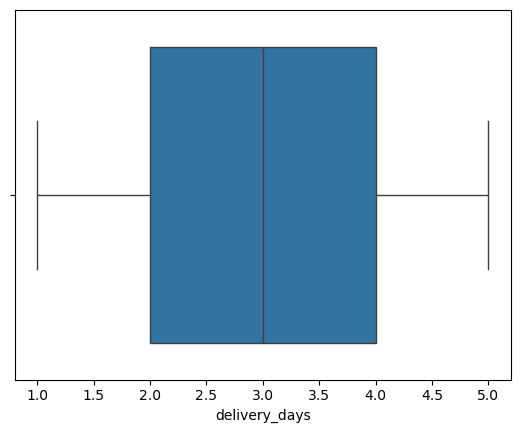

In [22]:
sns.boxplot(x = 'delivery_days' , data = df)

<Axes: xlabel='stock_available'>

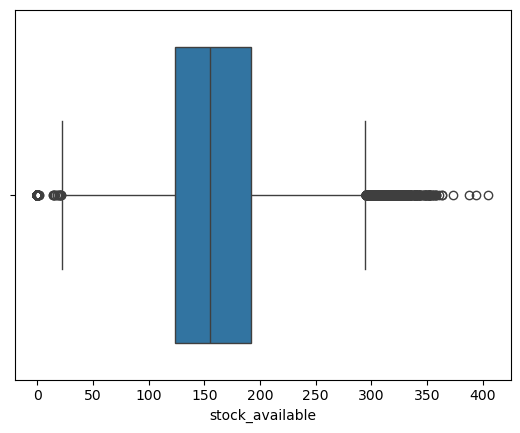

In [23]:
sns.boxplot(x = 'stock_available' , data = df)

<Axes: xlabel='delivered_qty'>

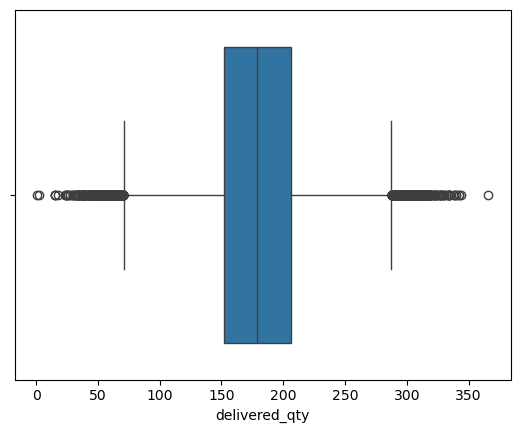

In [24]:
sns.boxplot(x = 'delivered_qty' , data = df)

<Axes: xlabel='units_sold'>

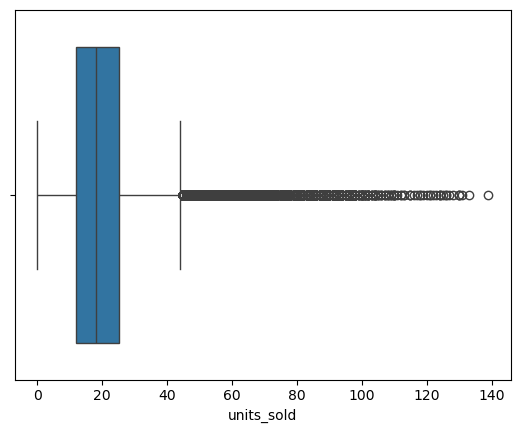

In [25]:
sns.boxplot(x = 'units_sold' , data = df)

There is no missing data in all columns


In [26]:
pip install datasist

Note: you may need to restart the kernel to use updated packages.


In [27]:
from datasist.structdata import detect_outliers

In [28]:
for col in df.select_dtypes(include='number').columns:
    outliers_indices = detect_outliers(df, 0, [col])   
    col_median = df[col].median()
    df.loc[outliers_indices, col] = col_median

In [29]:
df.describe()

,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
count,190754.000000,190754.0,190754.000000,190754.000000,190754.000000,190754.000000
mean,5.251989,0.0,3.004839,159.998658,179.335904,18.338258
std,2.166692,0.0,1.414626,46.274465,38.771168,8.594661
min,1.500000,0.0,1.000000,22.000000,71.000000,0.000000
25%,3.380000,0.0,2.000000,126.000000,153.000000,12.000000
50%,5.250000,0.0,3.000000,155.000000,179.000000,18.000000
75%,7.130000,0.0,4.000000,191.000000,206.000000,23.000000
max,9.000000,0.0,5.000000,294.000000,287.000000,44.000000


<Axes: xlabel='delivery_days'>

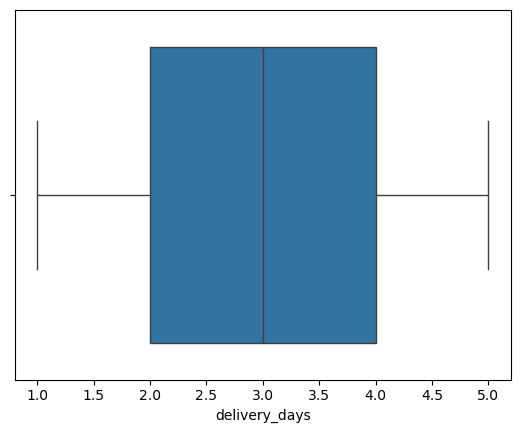

In [30]:
sns.boxplot(x = 'delivery_days' , data = df)

<Axes: xlabel='stock_available'>

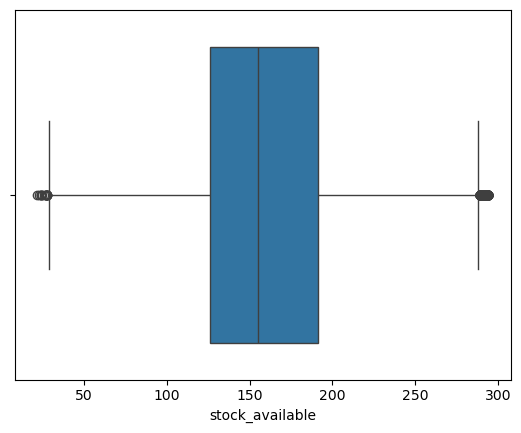

In [31]:
sns.boxplot(x = 'stock_available' , data = df)

<Axes: xlabel='delivered_qty'>

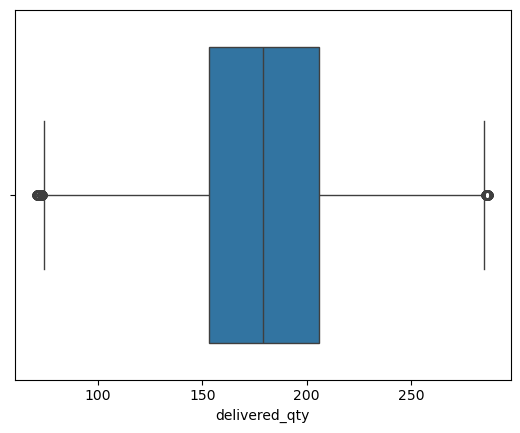

In [32]:
sns.boxplot(x = 'delivered_qty' , data = df)

<Axes: xlabel='units_sold'>

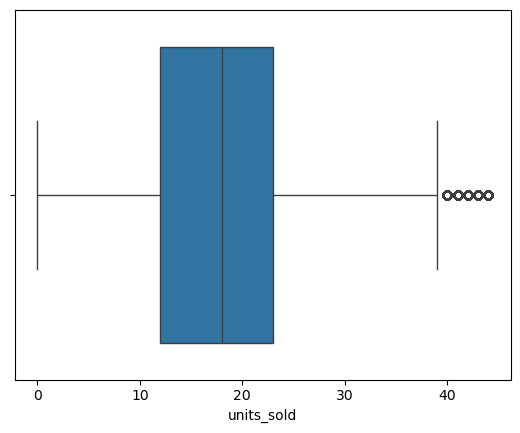

In [33]:
sns.boxplot(x = 'units_sold' , data = df)

In [34]:
df['Total_price per transaction'] = df['price_unit'] * df['units_sold']

In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 190754 entries, 0 to 190756
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   date                         190754 non-null  object 
 1   sku                          190754 non-null  object 
 2   brand                        190754 non-null  object 
 3   segment                      190754 non-null  object 
 4   category                     190754 non-null  object 
 5   channel                      190754 non-null  object 
 6   region                       190754 non-null  object 
 7   pack_type                    190754 non-null  object 
 8   price_unit                   190754 non-null  float64
 9   promotion_flag               190754 non-null  int64  
 10  delivery_days                190754 non-null  int64  
 11  stock_available              190754 non-null  int64  
 12  delivered_qty                190754 non-null  int64  
 13  unit

In [36]:
df['Total_price per transaction'] = df['Total_price per transaction'].astype(float)

In [37]:
df

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold,Total_price per transaction
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9,21.42
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,0,3,155,129,0,0.00
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8,32.00
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7,36.12
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12,91.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190752,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,2.55,0,2,190,163,25,63.75
190753,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,6.01,0,5,141,131,19,114.19
190754,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Single,3.45,0,5,155,132,0,0.00
190755,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Multipack,1.93,0,2,211,201,40,77.20


In [38]:
def stock_status(row):
    if row['delivered_qty'] > row['units_sold']:
        return "Overstock"
    elif row['delivered_qty'] < row['units_sold']:
        return "Stockout"
    else:
        return "Urgent restock"
        

In [39]:
df['stock status'] = df.apply(stock_status, axis=1)

In [40]:
df["sell_through_rate"] = (df["units_sold"] / df["stock_available"]) * 100

In [41]:
df.sample(30)

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold,Total_price per transaction,stock status,sell_through_rate
105637,2023-12-26,YO-029,YoBrand4,Yogurt-Seg2,Yogurt,Discount,PL-Central,Single,5.66,0,3,192,165,33,186.78,Overstock,17.187500
11384,2022-08-09,YO-029,YoBrand4,Yogurt-Seg2,Yogurt,Retail,PL-Central,Single,4.47,0,5,111,185,27,120.69,Overstock,24.324324
146298,2024-06-21,SN-013,SnBrand3,SnackBar-Seg2,SnackBar,Retail,PL-Central,Multipack,3.50,0,4,133,182,11,38.50,Overstock,8.270677
177109,2024-11-02,YO-014,YoBrand4,Yogurt-Seg3,Yogurt,Retail,PL-North,Multipack,6.99,0,2,236,210,17,118.83,Overstock,7.203390
1778,2022-04-09,YO-029,YoBrand4,Yogurt-Seg2,Yogurt,Retail,PL-South,Single,4.47,0,1,202,200,23,102.81,Overstock,11.386139
25417,2022-12-06,YO-029,YoBrand4,Yogurt-Seg2,Yogurt,Discount,PL-North,Single,3.69,0,1,94,115,5,18.45,Overstock,5.319149
77,2022-01-26,MI-026,MiBrand4,Milk-Seg2,Milk,E-commerce,PL-South,Single,2.68,0,4,216,183,14,37.52,Overstock,6.481481
75861,2023-08-19,MI-002,MiBrand2,Milk-Seg1,Milk,Retail,PL-Central,Single,5.41,0,3,220,234,20,108.20,Overstock,9.090909
139260,2024-05-21,JU-021,JuBrand3,Juice-Seg3,Juice,Retail,PL-Central,Multipack,2.92,0,5,155,183,0,0.00,Overstock,0.000000
168703,2024-09-26,YO-029,YoBrand4,Yogurt-Seg2,Yogurt,Discount,PL-Central,Carton,7.46,0,4,221,186,18,134.28,Overstock,8.144796


In [42]:
df['date'] = pd.to_datetime(df['date'])

In [43]:
df

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold,Total_price per transaction,stock status,sell_through_rate
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9,21.42,Overstock,6.382979
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,0,3,155,129,0,0.00,Overstock,0.000000
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8,32.00,Overstock,6.779661
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7,36.12,Overstock,8.641975
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12,91.92,Overstock,8.108108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190752,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,2.55,0,2,190,163,25,63.75,Overstock,13.157895
190753,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,6.01,0,5,141,131,19,114.19,Overstock,13.475177
190754,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Single,3.45,0,5,155,132,0,0.00,Overstock,0.000000
190755,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Multipack,1.93,0,2,211,201,40,77.20,Overstock,18.957346


In [44]:
df['year'] = df['date'].dt.year

In [45]:
df

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold,Total_price per transaction,stock status,sell_through_rate,year
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9,21.42,Overstock,6.382979,2022
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,0,3,155,129,0,0.00,Overstock,0.000000,2022
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8,32.00,Overstock,6.779661,2022
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7,36.12,Overstock,8.641975,2022
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12,91.92,Overstock,8.108108,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190752,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,2.55,0,2,190,163,25,63.75,Overstock,13.157895,2024
190753,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,6.01,0,5,141,131,19,114.19,Overstock,13.475177,2024
190754,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Single,3.45,0,5,155,132,0,0.00,Overstock,0.000000,2024
190755,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Multipack,1.93,0,2,211,201,40,77.20,Overstock,18.957346,2024


In [46]:
df['month'] = df['date'].dt.month

In [47]:
df

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold,Total_price per transaction,stock status,sell_through_rate,year,month
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9,21.42,Overstock,6.382979,2022,1
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,0,3,155,129,0,0.00,Overstock,0.000000,2022,1
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8,32.00,Overstock,6.779661,2022,1
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7,36.12,Overstock,8.641975,2022,1
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12,91.92,Overstock,8.108108,2022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190752,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,2.55,0,2,190,163,25,63.75,Overstock,13.157895,2024,12
190753,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,6.01,0,5,141,131,19,114.19,Overstock,13.475177,2024,12
190754,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Single,3.45,0,5,155,132,0,0.00,Overstock,0.000000,2024,12
190755,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Multipack,1.93,0,2,211,201,40,77.20,Overstock,18.957346,2024,12


In [48]:
df['day'] = df['date'].dt.day

In [49]:
df

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold,Total_price per transaction,stock status,sell_through_rate,year,month,day
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9,21.42,Overstock,6.382979,2022,1,21
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,0,3,155,129,0,0.00,Overstock,0.000000,2022,1,21
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8,32.00,Overstock,6.779661,2022,1,21
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7,36.12,Overstock,8.641975,2022,1,21
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12,91.92,Overstock,8.108108,2022,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190752,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,2.55,0,2,190,163,25,63.75,Overstock,13.157895,2024,12,31
190753,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,6.01,0,5,141,131,19,114.19,Overstock,13.475177,2024,12,31
190754,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Single,3.45,0,5,155,132,0,0.00,Overstock,0.000000,2024,12,31
190755,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Multipack,1.93,0,2,211,201,40,77.20,Overstock,18.957346,2024,12,31


In [50]:
df['is_discounted'] = ((df['promotion_flag'] == 1) | (df['channel'] == 'Discount' ))


In [51]:
df

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,...,stock_available,delivered_qty,units_sold,Total_price per transaction,stock status,sell_through_rate,year,month,day,is_discounted
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,...,141,128,9,21.42,Overstock,6.382979,2022,1,21,False
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,0,...,155,129,0,0.00,Overstock,0.000000,2022,1,21,False
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,...,118,161,8,32.00,Overstock,6.779661,2022,1,21,False
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,...,81,114,7,36.12,Overstock,8.641975,2022,1,21,True
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,...,148,204,12,91.92,Overstock,8.108108,2022,1,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190752,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,2.55,0,...,190,163,25,63.75,Overstock,13.157895,2024,12,31,True
190753,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,6.01,0,...,141,131,19,114.19,Overstock,13.475177,2024,12,31,True
190754,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Single,3.45,0,...,155,132,0,0.00,Overstock,0.000000,2024,12,31,False
190755,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Multipack,1.93,0,...,211,201,40,77.20,Overstock,18.957346,2024,12,31,False


Standardized feature scaling for numeric columns 

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x = df.drop('units_sold',axis = 1)
y = df['units_sold']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,shuffle = True, stratify=y)

In [54]:
from sklearn.preprocessing import StandardScaler


In [55]:
numeric_cols = x_train.select_dtypes(include=['int64', 'float64']).columns


In [56]:
scaler = StandardScaler ()

In [57]:
scaler.fit(x_train[numeric_cols])

StandardScaler()

In [58]:
scaled_x_train = scaler.transform(x_train[numeric_cols])

In [59]:
scaled_x_test = scaler.transform(x_test[numeric_cols])

In [60]:
scaled_x_train

array([[-1.47516345e+00,  0.00000000e+00, -1.41296077e+00, ...,
         2.23799784e-01, -1.00760881e+00, -4.38129660e-01],
       [ 1.24929907e+00,  0.00000000e+00, -5.36821617e-04, ...,
        -1.09182234e+00, -1.33003870e-02, -6.20545396e-01],
       [-1.38280878e+00,  0.00000000e+00, -1.41296077e+00, ...,
        -2.14740923e-01, -7.41230786e-01,  6.00566467e-01],
       ...,
       [-4.17702572e-01,  0.00000000e+00, -1.41296077e+00, ...,
         8.94509101e-01,  4.73522934e-01,  1.10734262e+00],
       [ 3.11899254e-01,  0.00000000e+00,  1.41188713e+00, ...,
        -2.66333948e-01, -1.17721844e-01, -4.68806629e-01],
       [-1.19809946e+00,  0.00000000e+00, -7.06748798e-01, ...,
         9.46102125e-01, -4.74534888e-01, -2.71067496e-01]])

In [61]:
scaled_x_train_df = pd.DataFrame(scaled_x_train, columns=numeric_cols, index=x_train.index)

In [62]:
scaled_x_train_df.head()

,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,Total_price per transaction,sell_through_rate
123685,-1.475163,0.0,-1.412961,0.195429,0.223800,-1.007609,-0.438130
180290,1.249299,0.0,-0.000537,-0.431210,-1.091822,-0.013300,-0.620545
106532,-1.382809,0.0,-1.412961,-0.193519,-0.214741,-0.741231,0.600566
119615,-0.177580,0.0,1.411887,-0.107086,-0.937043,-1.531464,-2.365541
71936,-0.357672,0.0,-0.706749,1.513530,0.455968,0.248627,-0.152684


Work with categorical data

In [63]:
categoric_columns = df.select_dtypes(include=['category']).columns

In [64]:
df['sku'].value_counts()

sku
MI-006    8221
MI-026    8216
YO-029    7909
YO-005    7893
YO-012    7719
RE-004    7643
YO-014    7630
YO-001    7574
RE-007    7488
RE-015    7366
MI-023    7202
JU-021    6943
YO-009    6778
SN-027    6435
YO-003    6341
MI-022    6249
YO-016    5991
RE-025    5990
SN-010    5869
RE-017    5748
SN-013    5501
YO-020    5416
SN-019    5229
MI-002    5067
MI-011    4863
YO-024    4850
MI-008    4777
SN-028    4748
YO-018    4606
SN-030    4492
Name: count, dtype: int64

In [65]:
df['brand'].value_counts()

brand
SnBrand2    26773
YoBrand4    22317
YoBrand3    18981
MiBrand3    18228
YoBrand2    17349
ReBrand4    14854
YoBrand1    14060
MiBrand1    13084
ReBrand2    11738
MiBrand4     8216
ReBrand1     7643
JuBrand3     6943
SnBrand3     5501
MiBrand2     5067
Name: count, dtype: int64

In [66]:
df['segment'].value_counts()

segment
Yogurt-Seg1       26851
Yogurt-Seg3       24812
Milk-Seg2         24105
Yogurt-Seg2       21044
Milk-Seg3         15423
ReadyMeal-Seg1    14854
SnackBar-Seg1     14469
ReadyMeal-Seg2    13391
SnackBar-Seg2     11370
Juice-Seg3         6943
SnackBar-Seg3      6435
ReadyMeal-Seg3     5990
Milk-Seg1          5067
Name: count, dtype: int64

In [67]:
df['category'].value_counts()

category
Yogurt       72707
Milk         44595
ReadyMeal    34235
SnackBar     32274
Juice         6943
Name: count, dtype: int64

In [68]:
df['channel'].value_counts()

channel
Retail        63687
E-commerce    63619
Discount      63448
Name: count, dtype: int64

In [69]:
df['region'].value_counts()

region
PL-North      63645
PL-South      63566
PL-Central    63543
Name: count, dtype: int64

In [70]:
df['pack_type'].value_counts()

pack_type
Carton       63669
Multipack    63550
Single       63535
Name: count, dtype: int64

In [71]:
df['is_discounted'].value_counts()

is_discounted
False    127306
True      63448
Name: count, dtype: int64

In [72]:
df['stock status'].value_counts()

stock status
Overstock    190754
Name: count, dtype: int64

In [73]:
df = pd.get_dummies(df, columns=['sku', 'brand', 'segment', 'category','channel','region','pack_type','is_discounted'], drop_first=True, dtype=int)

In [74]:
df

,date,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold,Total_price per transaction,stock status,sell_through_rate,...,category_ReadyMeal,category_SnackBar,category_Yogurt,channel_E-commerce,channel_Retail,region_PL-North,region_PL-South,pack_type_Multipack,pack_type_Single,is_discounted_True
0,2022-01-21,2.38,0,1,141,128,9,21.42,Overstock,6.382979,...,0,0,0,0,1,0,0,1,0,0
1,2022-01-21,1.55,0,3,155,129,0,0.00,Overstock,0.000000,...,0,0,0,0,1,1,0,0,1,0
2,2022-01-21,4.00,0,5,118,161,8,32.00,Overstock,6.779661,...,0,0,0,0,1,0,1,0,0,0
3,2022-01-21,5.16,0,2,81,114,7,36.12,Overstock,8.641975,...,0,0,0,0,0,0,0,0,1,1
4,2022-01-21,7.66,0,4,148,204,12,91.92,Overstock,8.108108,...,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190752,2024-12-31,2.55,0,2,190,163,25,63.75,Overstock,13.157895,...,0,1,0,0,0,1,0,0,1,1
190753,2024-12-31,6.01,0,5,141,131,19,114.19,Overstock,13.475177,...,0,1,0,0,0,0,1,0,1,1
190754,2024-12-31,3.45,0,5,155,132,0,0.00,Overstock,0.000000,...,0,1,0,1,0,0,0,0,1,0
190755,2024-12-31,1.93,0,2,211,201,40,77.20,Overstock,18.957346,...,0,1,0,1,0,1,0,1,0,0


In [73]:
from sklearn.preprocessing import OneHotEncoder
Encoder = OneHotEncoder(sparse_output=False, drop='first')

In [74]:
Transformed_sku = Encoder.fit_transform(df[['sku']])

In [75]:
Transformed_sku_Df = pd.DataFrame(Transformed_sku , columns= Encoder.get_feature_names_out())

In [76]:
Transformed_sku_Df

,sku_MI-002,sku_MI-006,sku_MI-008,sku_MI-011,sku_MI-022,sku_MI-023,sku_MI-026,sku_RE-004,sku_RE-007,sku_RE-015,...,sku_YO-003,sku_YO-005,sku_YO-009,sku_YO-012,sku_YO-014,sku_YO-016,sku_YO-018,sku_YO-020,sku_YO-024,sku_YO-029
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
190750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
190751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
190752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
Transformed_brand = Encoder.fit_transform(df[['brand']])

In [78]:
Transformed_brand_Df = pd.DataFrame(Transformed_brand , columns= Encoder.get_feature_names_out())

In [79]:
Transformed_brand_Df

,brand_MiBrand1,brand_MiBrand2,brand_MiBrand3,brand_MiBrand4,brand_ReBrand1,brand_ReBrand2,brand_ReBrand4,brand_SnBrand2,brand_SnBrand3,brand_YoBrand1,brand_YoBrand2,brand_YoBrand3,brand_YoBrand4
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
190750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
190751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
190752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [80]:
Transformed_segment = Encoder.fit_transform(df[['segment']])

In [81]:
Transformed_segment_Df = pd.DataFrame(Transformed_segment , columns= Encoder.get_feature_names_out())

In [82]:
Transformed_segment_Df

,segment_Milk-Seg1,segment_Milk-Seg2,segment_Milk-Seg3,segment_ReadyMeal-Seg1,segment_ReadyMeal-Seg2,segment_ReadyMeal-Seg3,segment_SnackBar-Seg1,segment_SnackBar-Seg2,segment_SnackBar-Seg3,segment_Yogurt-Seg1,segment_Yogurt-Seg2,segment_Yogurt-Seg3
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
190749,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
190750,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
190751,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
190752,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [83]:
Transformed_category = Encoder.fit_transform(df[['category']])

In [84]:
Transformed_category_Df = pd.DataFrame(Transformed_category , columns= Encoder.get_feature_names_out())

In [85]:
Transformed_category_Df 

,category_Milk,category_ReadyMeal,category_SnackBar,category_Yogurt
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
190749,0.0,0.0,1.0,0.0
190750,0.0,0.0,1.0,0.0
190751,0.0,0.0,1.0,0.0
190752,0.0,0.0,1.0,0.0


In [86]:
Transformed_channel = Encoder.fit_transform(df[['channel']])

In [87]:
Transformed_channel_Df = pd.DataFrame(Transformed_channel , columns= Encoder.get_feature_names_out())

In [88]:
Transformed_channel_Df

,channel_E-commerce,channel_Retail
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,0.0
4,0.0,0.0
...,...,...
190749,0.0,0.0
190750,0.0,0.0
190751,1.0,0.0
190752,1.0,0.0


In [89]:
Transformed_region = Encoder.fit_transform(df[['region']])

In [90]:
Transformed_region_Df = pd.DataFrame(Transformed_region , columns= Encoder.get_feature_names_out())

In [91]:
Transformed_region_Df

,region_PL-North,region_PL-South
0,0.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,0.0
4,1.0,0.0
...,...,...
190749,1.0,0.0
190750,0.0,1.0
190751,0.0,0.0
190752,1.0,0.0


In [92]:
Transformed_pack_type = Encoder.fit_transform(df[['pack_type']])

In [93]:
Transformed_pack_type_Df = pd.DataFrame(Transformed_pack_type , columns= Encoder.get_feature_names_out())

In [94]:
Transformed_pack_type_Df

,pack_type_Multipack,pack_type_Single
0,1.0,0.0
1,0.0,1.0
2,0.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
190749,0.0,1.0
190750,0.0,1.0
190751,0.0,1.0
190752,1.0,0.0


In [95]:
Transformed_is_discounted = Encoder.fit_transform(df[['is_discounted']])

In [96]:
Transformed_is_discounted_Df = pd.DataFrame(Transformed_is_discounted , columns= Encoder.get_feature_names_out())

In [97]:
Transformed_is_discounted_Df 

,is_discounted_True
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0
...,...
190749,1.0
190750,1.0
190751,0.0
190752,0.0


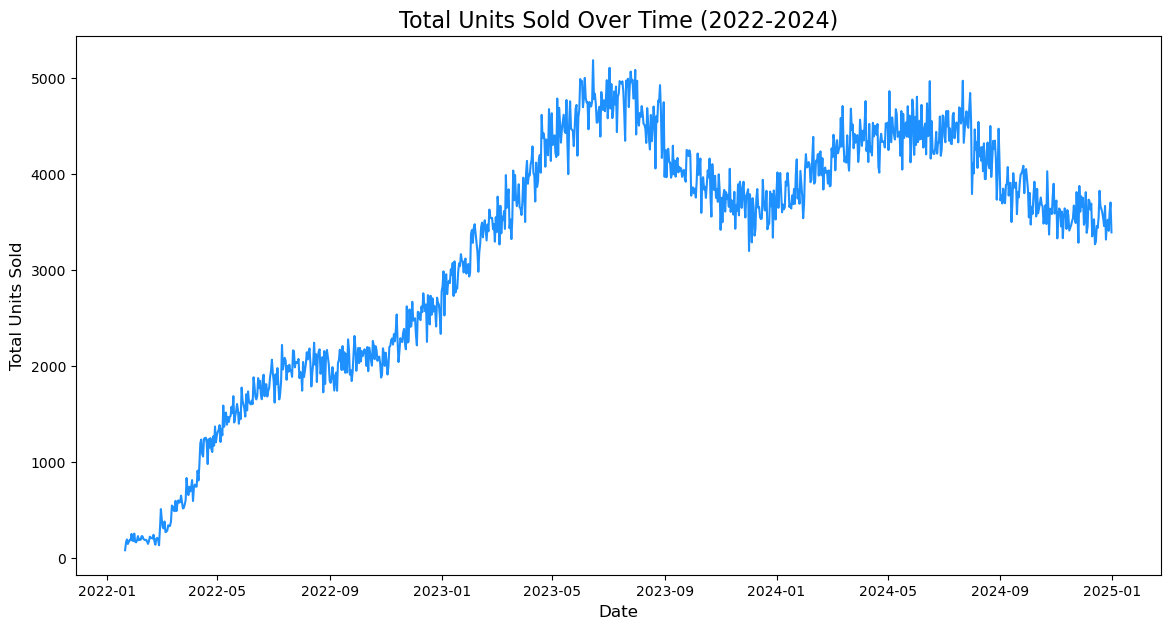

In [98]:
# Plotting total units sold over time
plt.figure(figsize=(14, 7))
sales_over_time = df.groupby('date')['units_sold'].sum()

plt.plot(sales_over_time.index, sales_over_time.values, color='dodgerblue')
plt.title('Total Units Sold Over Time (2022-2024)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Units Sold', fontsize=12)
plt.show()

b. Total Units Sold by Category A bar chart is perfect for comparing sales across different product categories.

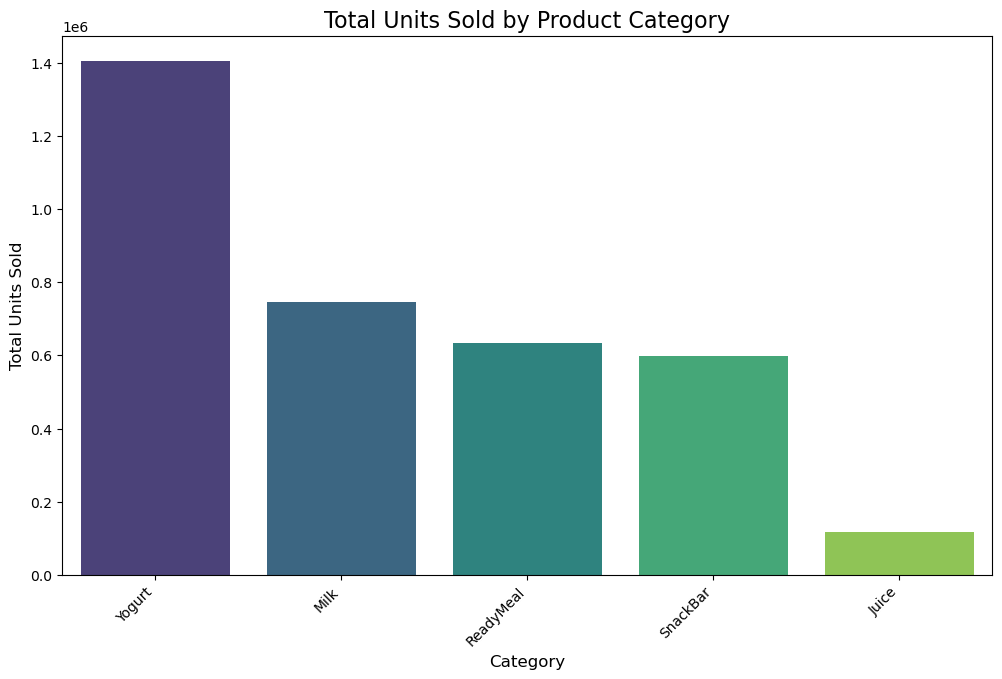

In [99]:
plt.figure(figsize=(12, 7))
category_sales = df.groupby('category')['units_sold'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values, hue=category_sales.index, palette='viridis', legend=False)
plt.title('Total Units Sold by Product Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Units Sold', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


c. Total Revenue by category Let's see which category is performing the best in terms of sales.

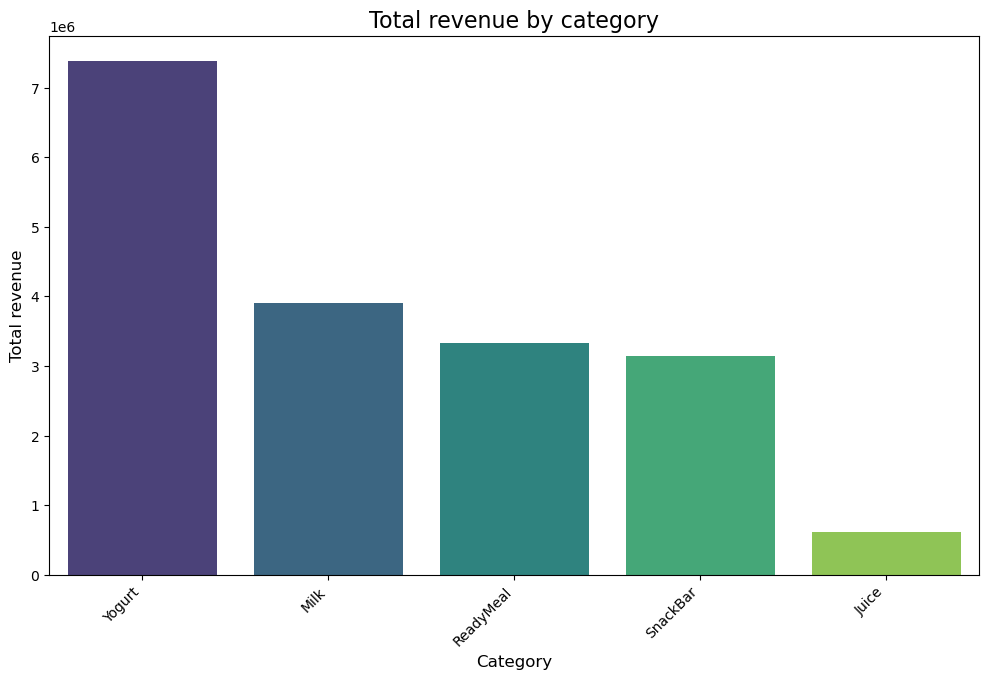

In [102]:
plt.figure(figsize=(12, 7))
category_Total_sales = df.groupby('category')['Total_price per transaction'].sum().sort_values(ascending=False)
sns.barplot(x=category_Total_sales.index, y=category_Total_sales.values, hue=category_Total_sales.index, palette='viridis', legend=False)
plt.title('Total revenue by category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total revenue', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

d. Total Units Sold by Region Let's see which regions are performing the best in terms of sales.

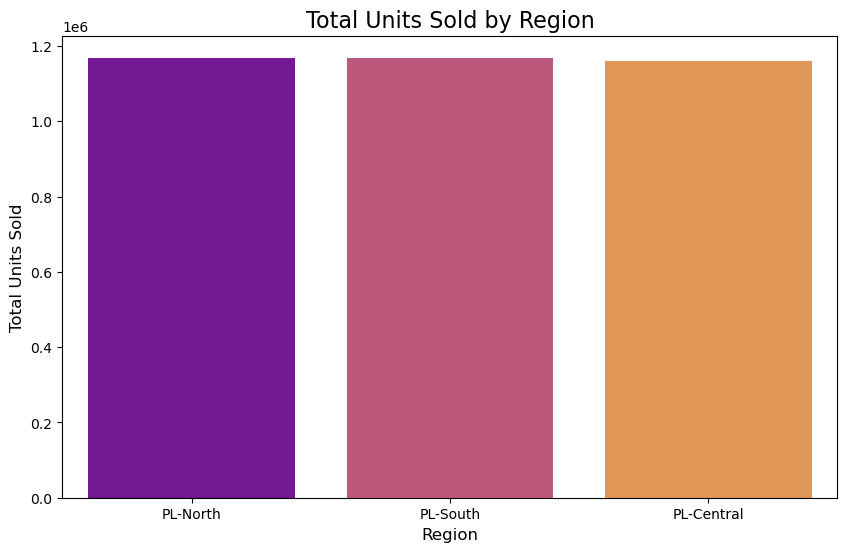

In [100]:
# Plotting total units sold by region
plt.figure(figsize=(10, 6))
region_sales = df.groupby('region')['units_sold'].sum().sort_values(ascending=False)
sns.barplot(x=region_sales.index, y=region_sales.values, hue=region_sales.index, palette='plasma', legend=False)
plt.title('Total Units Sold by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Units Sold', fontsize=12)
plt.show()

e. No. of discounted transactions by category Let's see which regions are performing the best in terms of sales

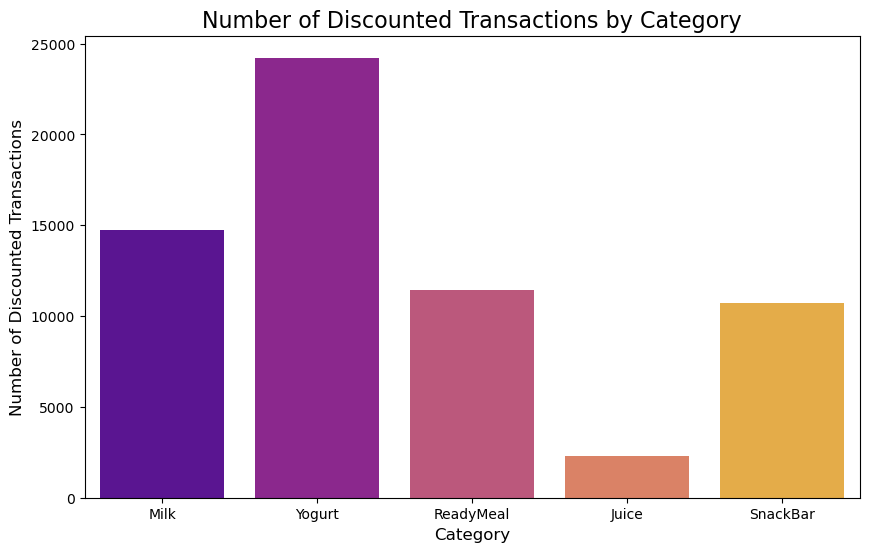

In [113]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['is_discounted'] == True], x='category', hue='category', palette='plasma',legend=False)
plt.title('Number of Discounted Transactions by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Discounted Transactions', fontsize=12)
plt.show()